<h2>JSON Reader</h2>
<p>JSON is taken from finance.yahoo.com and is converted into easily transformable data structure
<p>

In [27]:
import json
import os
import datetime
import pandas as pd
import numpy

<h2>Helper Functions</h2>
<li>print_array</li>
<li>load_data</li>
<li>UTC_milisecond_to_datetime</li>
<li>extract_dataset</li>

In [32]:
def print_array(list):
    for x in list:
        print(x, end='|type is ')
        print(type(x))

def load_data():
    filename = os.getcwd() + '/market-price-2.json'

    f = open(filename)
    data = json.load(f)
    
    return data

def UTC_milisecond_to_datetime(time_price_dictionary):
    for dictionary in time_price_dictionary:
        dictionary['x'] = (datetime.datetime.fromtimestamp(dictionary['x']/1000.0))

def pandas_test(JSON_to_plot):
    df = pd.DataFrame(JSON_to_plot)
    print (df)
    df.plot(x='x', y='y')

def halving(to_half):
    hdates = [datetime.datetime(2012, 11, 28, 0, 0), datetime.datetime(2016, 7, 9, 0, 0), datetime.datetime(2020, 5, 11, 0, 0)]
    

<h2> Main Functions </h2>
<p>Things to implement...</p>
<p><s>plot the whole data set</s> : pandas_test</p>
<p>ability to divide the dataset by halving dates</p>

<h3>Execution

                       x         y
0    2009-01-03 13:00:00      0.00
1    2009-01-06 13:00:00      0.00
2    2009-01-09 13:00:00      0.00
3    2009-01-12 13:00:00      0.00
4    2009-01-15 13:00:00      0.00
...                  ...       ...
1695 2022-12-06 13:00:00  16967.02
1696 2022-12-09 13:00:00  17234.58
1697 2022-12-12 13:00:00  17098.61
1698 2022-12-15 13:00:00  17802.44
1699 2022-12-18 13:00:00  16783.60

[1700 rows x 2 columns]


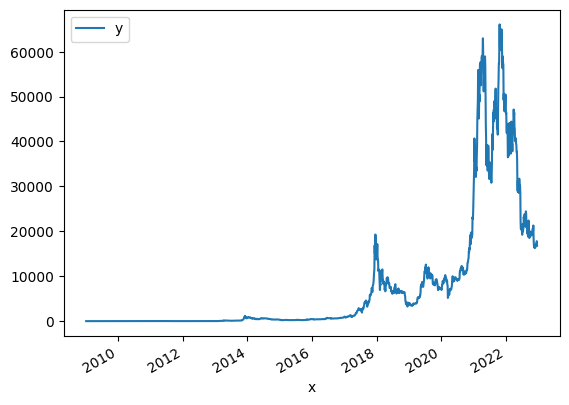

In [33]:
data = load_data()

UTC_milisecond_to_datetime(data['market-price'])
halving(data['market-price'])
pandas_test(data['market-price'])


In [57]:
hdates = [datetime.datetime(2012, 11, 28, 0, 0), datetime.datetime(2016, 7, 9, 0, 0), datetime.datetime(2020, 5, 11, 0, 0)]
d_index = 0
h_index = 0
halved_dataset = []
df = pd.DataFrame(data['market-price'])
for index, row in df.iterrows():
    if d_index!= len(hdates) and hdates[d_index] < row['x']:
        print('Halving date reached or exceeded, incrementing halving date counter. Currently at halving date number ' +str(d_index+1)+' '+ str(hdates[d_index]))
        d_index+=1
        halved_dataset.append(df.iloc[h_index:index])
        h_index = index
halved_dataset.append(df.iloc[h_index:])
print(halved_dataset)
    

Halving date reached or exceeded, incrementing halving date counter. Currently at halving date number 1 2012-11-28 00:00:00
Halving date reached or exceeded, incrementing halving date counter. Currently at halving date number 2 2016-07-09 00:00:00
Halving date reached or exceeded, incrementing halving date counter. Currently at halving date number 3 2020-05-11 00:00:00
[                      x      y
0   2009-01-03 13:00:00   0.00
1   2009-01-06 13:00:00   0.00
2   2009-01-09 13:00:00   0.00
3   2009-01-12 13:00:00   0.00
4   2009-01-15 13:00:00   0.00
..                  ...    ...
470 2012-11-13 13:00:00  11.17
471 2012-11-16 13:00:00  11.28
472 2012-11-19 13:00:00  11.82
473 2012-11-22 13:00:00  11.90
474 2012-11-25 13:00:00  12.46

[475 rows x 2 columns],                       x       y
475 2012-11-28 13:00:00   12.50
476 2012-12-01 13:00:00   12.66
477 2012-12-04 13:00:00   12.75
478 2012-12-07 13:00:00   13.69
479 2012-12-10 13:00:00   13.53
..                  ...     ...
910 20

In [53]:
df = pd.DataFrame(data['market-price'])